# Clustering

In [ ]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 6.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━

In [ ]:
import pycaret
pycaret.__version__

'3.3.2'

In [ ]:
from pycaret.datasets import get_data
cancerData = get_data('cancer')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,5,1,1,1,2,1,3,1,1
1,0,5,4,4,5,7,10,3,2,1
2,0,3,1,1,1,2,2,3,1,1
3,0,6,8,8,1,3,4,3,7,1
4,0,4,1,1,3,2,1,3,1,1


## Setup

In [ ]:
# import pycaret clustering and init setup
from pycaret.clustering import *
s = setup(cancerData, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# import ClusteringExperiment and init the class
from pycaret.clustering import ClusteringExperiment
exp = ClusteringExperiment()

In [ ]:
# check the type of exp
type(exp)

pycaret.clustering.oop.ClusteringExperiment

In [ ]:
# init setup on exp
exp.setup(cancerData, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# train kmeans model
kmeans = create_model('kmeans')# to check all the available models

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4915,495.7612,1.8551,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
# to check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
# train meanshift model
meanshift = create_model('meanshift')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.4759,124.3155,1.4191,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_cluster = assign_model(kmeans)
kmeans_cluster

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0,5,1,1,1,2,1,3,1,1,Cluster 0
1,0,5,4,4,5,7,10,3,2,1,Cluster 2
2,0,3,1,1,1,2,2,3,1,1,Cluster 0
3,0,6,8,8,1,3,4,3,7,1,Cluster 2
4,0,4,1,1,3,2,1,3,1,1,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1,Cluster 0
679,0,2,1,1,1,2,1,1,1,1,Cluster 0
680,1,5,10,10,3,7,3,8,10,2,Cluster 1
681,1,4,8,6,4,3,4,10,6,1,Cluster 1


In [ ]:
# plot pca cluster plot
plot_model(kmeans, plot = 'cluster')

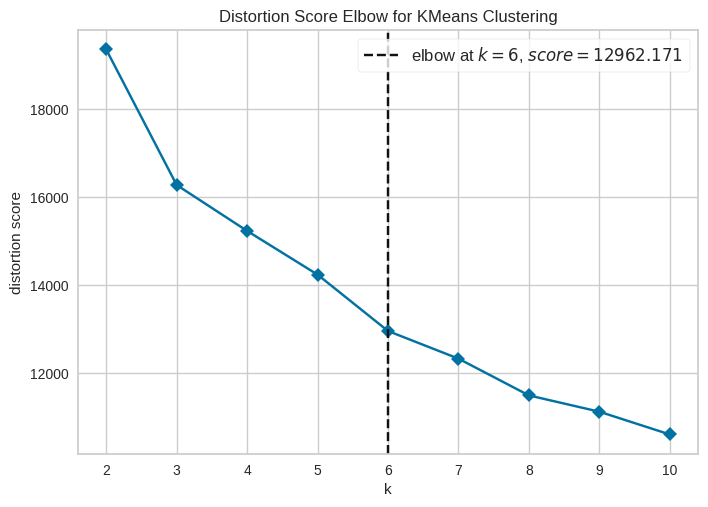

In [ ]:
# plot elbow
plot_model(kmeans, plot = 'elbow')

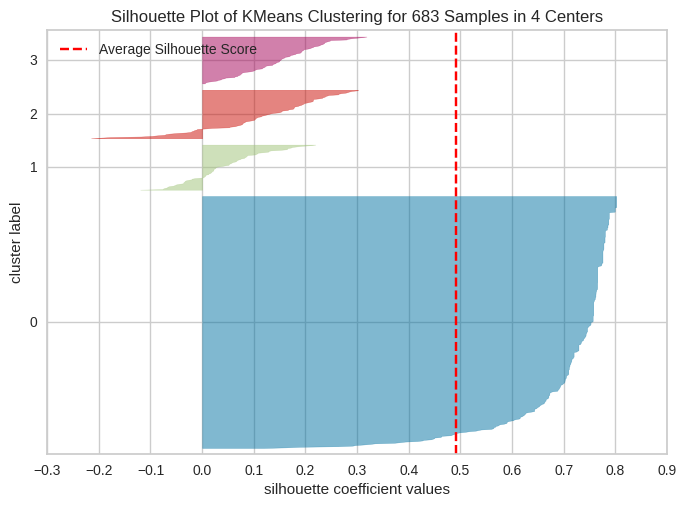

In [ ]:
# plot silhouette
plot_model(kmeans, plot = 'silhouette')

In [ ]:
evaluate_model(kmeans)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
# predict on test set
kmeans_pred = predict_model(kmeans, data=cancerData)
kmeans_pred

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
1,0.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0,Cluster 2
2,0.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0,Cluster 0
3,0.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0,Cluster 2
4,0.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0,Cluster 0
...,...,...,...,...,...,...,...,...,...,...,...
678,0.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0,Cluster 0
679,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,Cluster 0
680,1.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0,Cluster 1
681,1.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0,Cluster 1


In [ ]:
# save pipeline
save_model(kmeans, 'kmeans_pipeline')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Class', 'age', 'menopause',
                                              'tumor-size', 'inv-nodes',
                                              'node-caps', 'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'kmeans_pipeline.pkl')

In [ ]:
# load pipeline
kmeans_pipeline = load_model('kmeans_pipeline')
kmeans_pipeline

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Class', 'age', 'menopause',
                                             'tumor-size', 'inv-nodes',
                                             'node-caps', 'deg-malig', 'breast',
                                             'breast-quad', 'irradiat'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [ ]:
# init setup
s = setup(cancerData, session_id = 123)

,Description,Value
0,Session id,123
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,CPU Jobs,-1
9,Use GPU,False


In [ ]:
# check all available config
get_config()

{'USI',
 'X',
 'X_train',
 'X_train_transformed',
 'X_transformed',
 '_available_plots',
 '_ml_usecase',
 'data',
 'dataset',
 'dataset_transformed',
 'exp_id',
 'exp_name_log',
 'gpu_n_jobs_param',
 'gpu_param',
 'html_param',
 'idx',
 'is_multiclass',
 'log_plots_param',
 'logging_param',
 'memory',
 'n_jobs_param',
 'pipeline',
 'seed',
 'train',
 'train_transformed',
 'variable_and_property_keys',
 'variables'}

In [ ]:
# lets access X_train_transformed
get_config('X_train_transformed')

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0.0,5.0,1.0,1.0,1.0,2.0,1.0,3.0,1.0,1.0
1,0.0,5.0,4.0,4.0,5.0,7.0,10.0,3.0,2.0,1.0
2,0.0,3.0,1.0,1.0,1.0,2.0,2.0,3.0,1.0,1.0
3,0.0,6.0,8.0,8.0,1.0,3.0,4.0,3.0,7.0,1.0
4,0.0,4.0,1.0,1.0,3.0,2.0,1.0,3.0,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...
678,0.0,3.0,1.0,1.0,1.0,3.0,2.0,1.0,1.0,1.0
679,0.0,2.0,1.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0
680,1.0,5.0,10.0,10.0,3.0,7.0,3.0,8.0,10.0,2.0
681,1.0,4.0,8.0,6.0,4.0,3.0,4.0,10.0,6.0,1.0


In [ ]:
# another example: let's access seed
print("The current seed is: {}".format(get_config('seed')))

# now lets change it using set_config
set_config('seed', 786)
print("The new seed is: {}".format(get_config('seed')))

The current seed is: 123
The new seed is: 786


In [ ]:
# init setup with normalize = True

s = setup(cancerData, session_id = 123,
          normalize = True, normalize_method = 'minmax')

,Description,Value
0,Session id,123
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax


<Axes: >

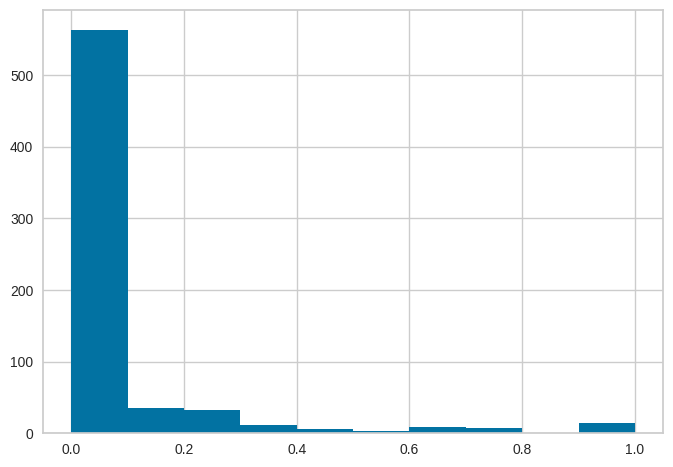

In [ ]:
# lets check the X_train_transformed to see effect of params passed
get_config('X_train_transformed')['irradiat'].hist()

<Axes: >

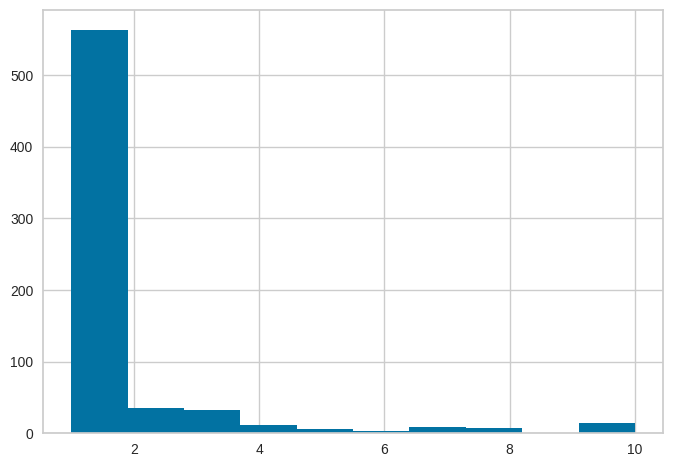

In [ ]:
get_config('X_train')['irradiat'].hist()

In [ ]:
# check all the available models
models()

,Name,Reference
ID,,
kmeans,K-Means Clustering,sklearn.cluster._kmeans.KMeans
ap,Affinity Propagation,sklearn.cluster._affinity_propagation.Affinity...
meanshift,Mean Shift Clustering,sklearn.cluster._mean_shift.MeanShift
sc,Spectral Clustering,sklearn.cluster._spectral.SpectralClustering
hclust,Agglomerative Clustering,sklearn.cluster._agglomerative.AgglomerativeCl...
dbscan,Density-Based Spatial Clustering,sklearn.cluster._dbscan.DBSCAN
optics,OPTICS Clustering,sklearn.cluster._optics.OPTICS
birch,Birch Clustering,sklearn.cluster._birch.Birch


In [ ]:
# train kmeans
kmeans = create_model('kmeans')

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2633,632.9525,1.6298,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

In [ ]:
kmeans_results = pull()
print(type(kmeans_results))
kmeans_results

<class 'pandas.core.frame.DataFrame'>


,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2633,632.9525,1.6298,0,0,0


In [ ]:
# train kmeans with 10 clusters
create_model('kmeans', num_clusters = 10)

,Silhouette,Calinski-Harabasz,Davies-Bouldin,Homogeneity,Rand Index,Completeness
0,0.2563,335.7939,1.5963,0,0,0


Processing:   0%|          | 0/3 [00:00<?, ?it/s]

KMeans(n_clusters=10, random_state=123)

In [ ]:
assign_model(kmeans)

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Cluster
0,0,5,1,1,1,2,1,3,1,1,Cluster 2
1,0,5,4,4,5,7,10,3,2,1,Cluster 3
2,0,3,1,1,1,2,2,3,1,1,Cluster 0
3,0,6,8,8,1,3,4,3,7,1,Cluster 2
4,0,4,1,1,3,2,1,3,1,1,Cluster 2
...,...,...,...,...,...,...,...,...,...,...,...
678,0,3,1,1,1,3,2,1,1,1,Cluster 0
679,0,2,1,1,1,2,1,1,1,1,Cluster 0
680,1,5,10,10,3,7,3,8,10,2,Cluster 1
681,1,4,8,6,4,3,4,10,6,1,Cluster 1


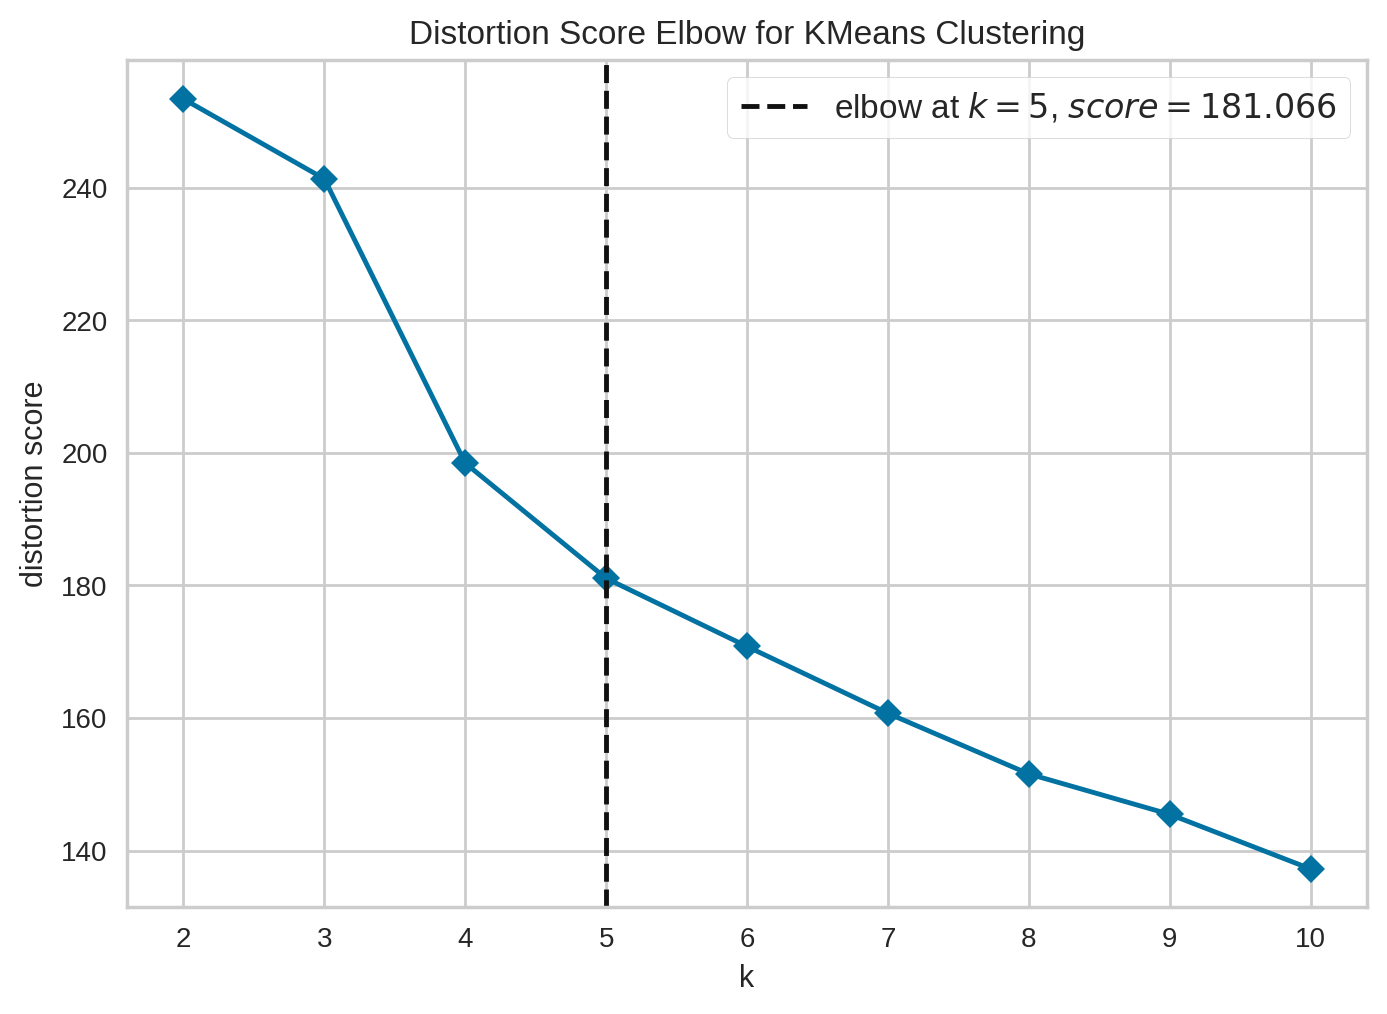

In [ ]:
# to control the scale of plot
plot_model(kmeans, plot = 'elbow', scale = 2)

In [ ]:
# to save the plot
plot_model(kmeans, plot = 'elbow', save=True)

'Elbow Plot.png'

In [ ]:
# save model
save_model(kmeans, 'my_first_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Class', 'age', 'menopause',
                                              'tumor-size', 'inv-nodes',
                                              'node-caps', 'deg-malig', 'breast',
                                              'breast-quad', 'irradiat'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=[],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                 ('trained_model', KMeans(n_clusters=4, random_state=123))]),
 'my_first_model.pkl')

In [ ]:
# load model
loaded_from_disk = load_model('my_first_model')
loaded_from_disk

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(include=['Class', 'age', 'menopause',
                                             'tumor-size', 'inv-nodes',
                                             'node-caps', 'deg-malig', 'breast',
                                             'breast-quad', 'irradiat'],
                                    transformer=SimpleImputer())),
                ('categorical_imputer',
                 TransformerWrapper(include=[],
                                    transformer=SimpleImputer(strategy='most_frequent'))),
                ('normalize', TransformerWrapper(transformer=MinMaxScaler())),
                ('trained_model', KMeans(n_clusters=4, random_state=123))])

In [ ]:
# save experiment
save_experiment('my_experiment')

In [ ]:
# load experiment from disk
exp_from_disk = load_experiment('my_experiment', data=cancerData)

,Description,Value
0,Session id,123
1,Original data shape,"(683, 10)"
2,Transformed data shape,"(683, 10)"
3,Numeric features,10
4,Preprocess,True
5,Imputation type,simple
6,Numeric imputation,mean
7,Categorical imputation,mode
8,Normalize,True
9,Normalize method,minmax
